In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import csv
import os

In [2]:
# importing the dataset and converting into a dataframe here
df = pd.read_csv('UCI Census Income.csv')

In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

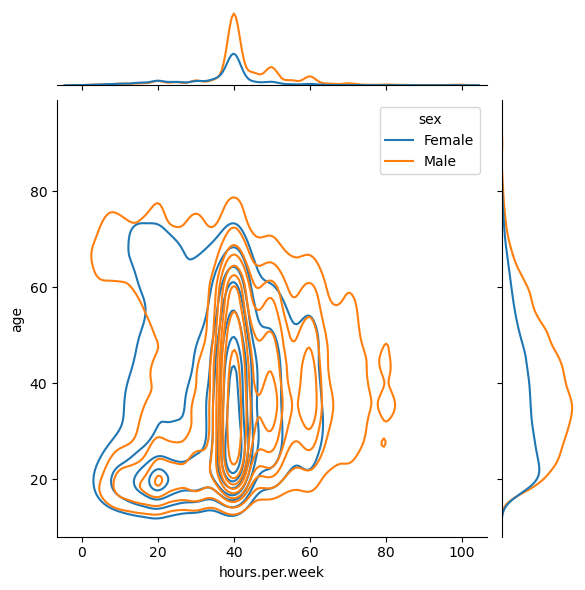

In [4]:
# Shows the relationship between age, hours per week and the sex
sns.jointplot(data=df, x="hours.per.week", y="age", hue="sex", kind="kde",)
plt.savefig('jointplot1.png')

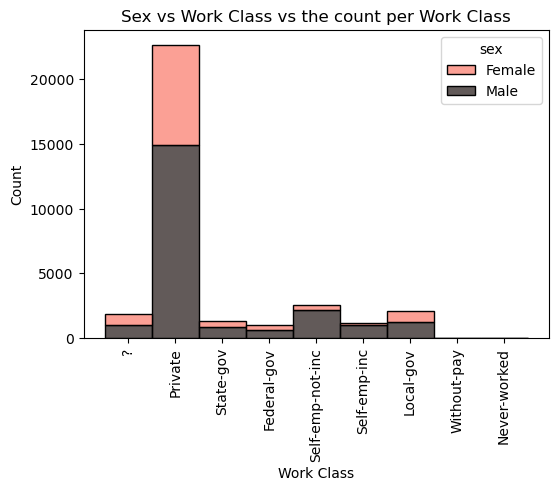

In [5]:
# plot to find the relationship between the number of different working class people with respect to the sex
plt.figure(figsize=(6, 4))
sns.histplot(df, x="workclass", hue="sex", multiple="stack", palette="dark:salmon_r")
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Sex vs Work Class vs the count per Work Class')
plt.savefig('StackedBarPlot.png')
plt.show()

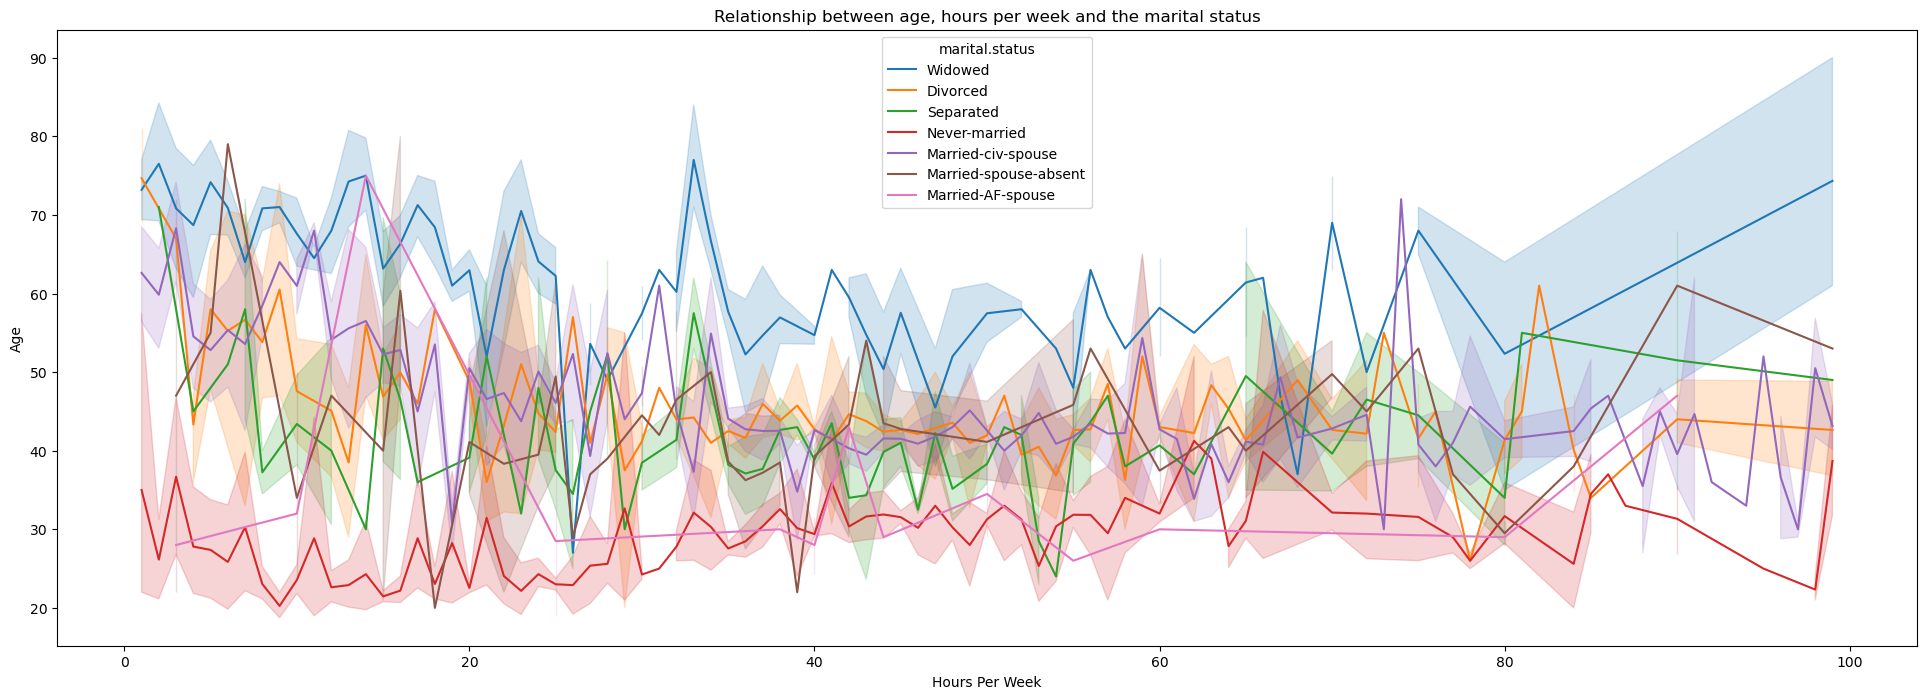

In [6]:
# Shows the relationship between age, hours per week and the marital status
plt.figure(figsize=(24, 8))
sns.lineplot(data=df, x="hours.per.week", y="age", hue="marital.status",)
plt.xlabel('Hours Per Week')
plt.ylabel('Age')
plt.title('Relationship between age, hours per week and the marital status')
plt.savefig('Lineplot.png')
plt.show()

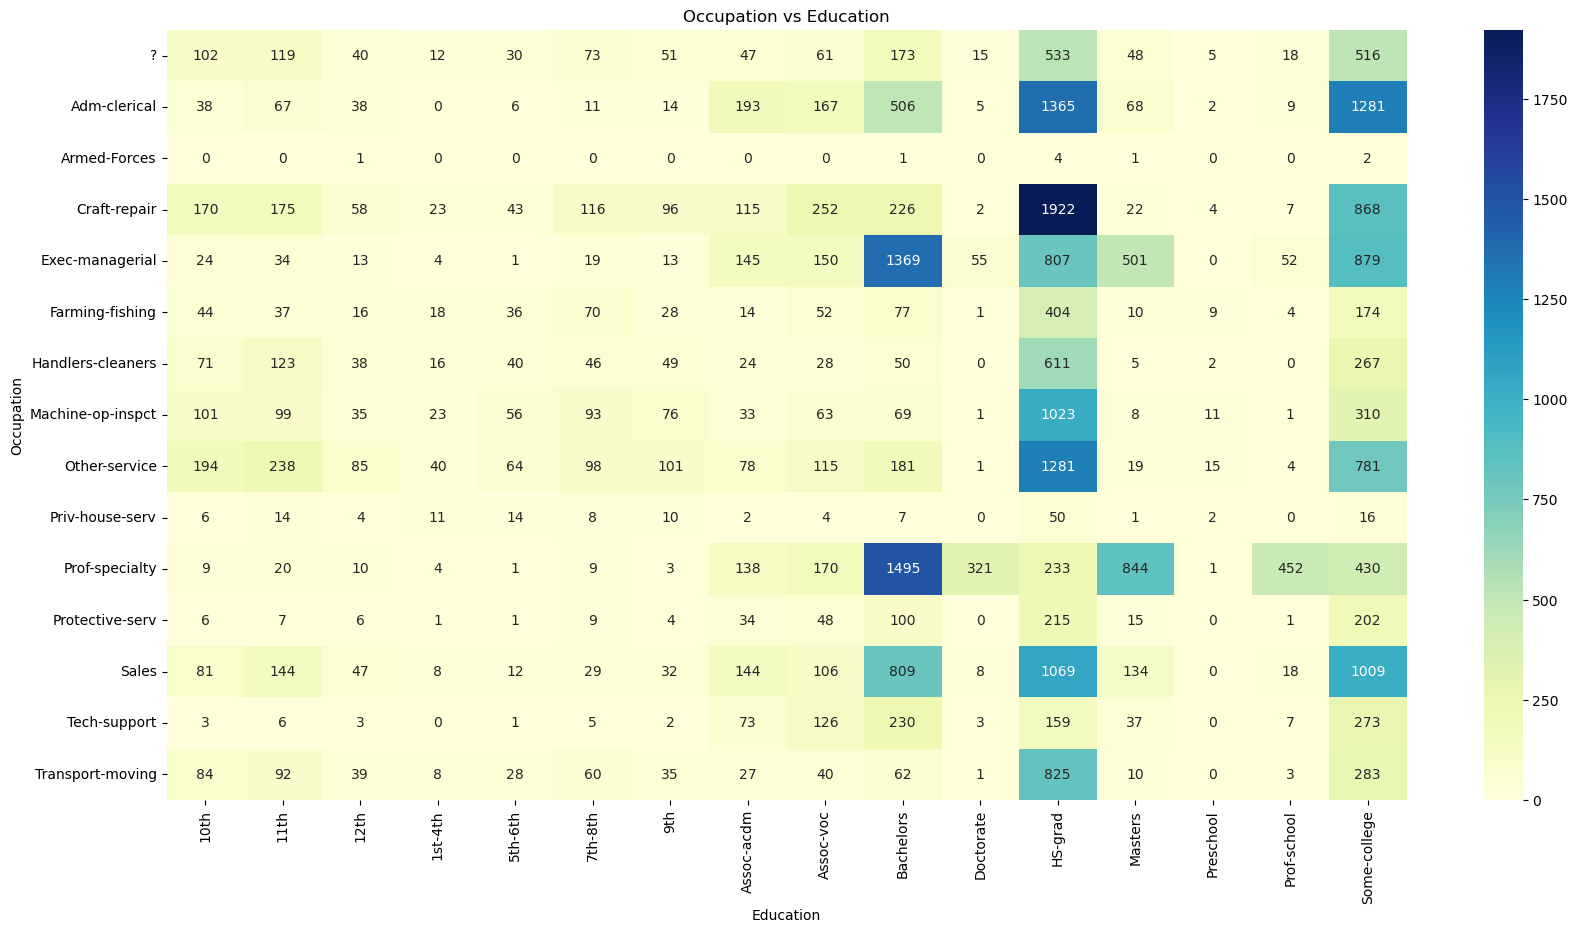

In [7]:
# Relationship between education and occupation
data = pd.crosstab(df['occupation'], df['education'])
plt.figure(figsize=(20, 10))
sns.heatmap(data, annot=True, cmap="YlGnBu", fmt='g', cbar=True)
plt.xlabel('Education')
plt.ylabel('Occupation')
plt.title('Occupation vs Education')
plt.savefig('correlationPlot.png')
plt.show()

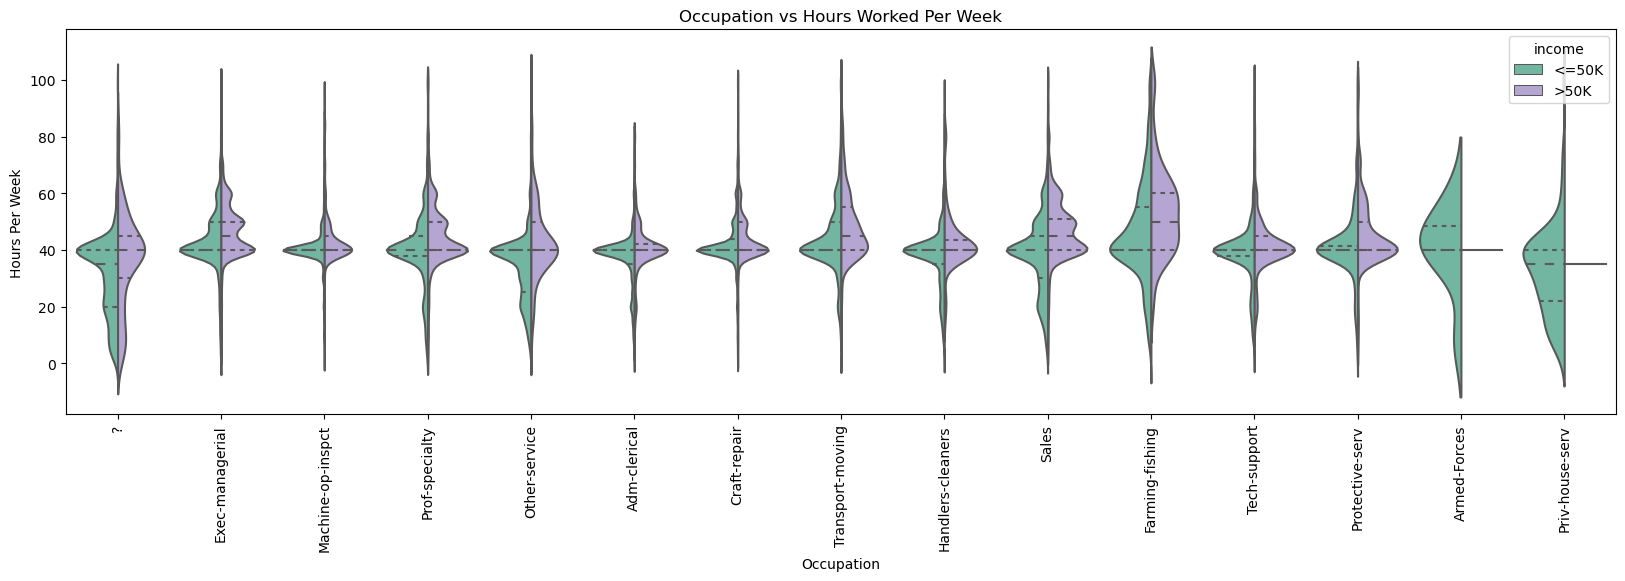

In [8]:
# relationship between the income, number of hours worked per week and the occupation
plt.figure(figsize=(20, 5))
sns.violinplot(data=df, x="occupation", y="hours.per.week", hue="income", split=True, inner="quart", fill=False, palette={"<=50K": "#66c2a5", ">50K": "#b39ddb"})
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.ylabel('Hours Per Week')
plt.title('Occupation vs Hours Worked Per Week')
plt.savefig('violinPlot.png', bbox_inches='tight', dpi=300)
plt.show()

In [9]:
# relationship between education and the income
tabulation = pd.crosstab(df['education'], df['income'])
print(tabulation)

income        <=50K  >50K
education                
10th            871    62
11th           1115    60
12th            400    33
1st-4th         162     6
5th-6th         317    16
7th-8th         606    40
9th             487    27
Assoc-acdm      802   265
Assoc-voc      1021   361
Bachelors      3134  2221
Doctorate       107   306
HS-grad        8826  1675
Masters         764   959
Preschool        51     0
Prof-school     153   423
Some-college   5904  1387


In [20]:
# relationship between native country and income
contingency_table = pd.crosstab(df['native.country'], df['income'])
contingency_table['percentage_greaterThan_50K'] = (contingency_table['>50K'] / (contingency_table['<=50K'] + contingency_table['>50K'])) * 100
highlighted_table = contingency_table.style.apply(lambda x: ['background-color: yellow' if x.name == 'percentage_greaterThan_50K' and val < 30 else '' for val in x])
display(highlighted_table)

income,<=50K,>50K,percentage_greaterThan_50K
native.country,,,
?,437,146,25.042882
Cambodia,12,7,36.842105
Canada,82,39,32.231405
China,55,20,26.666667
Columbia,57,2,3.389831
Cuba,70,25,26.315789
Dominican-Republic,68,2,2.857143
Ecuador,24,4,14.285714
El-Salvador,97,9,8.490566


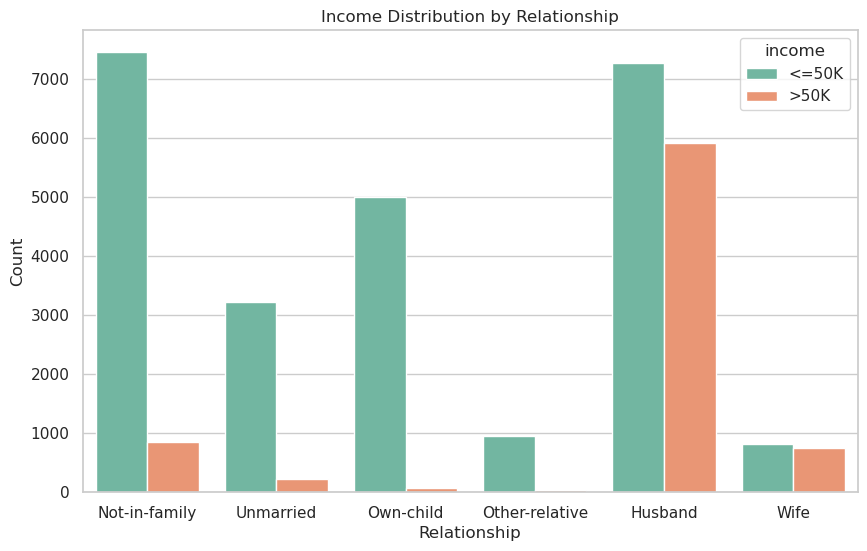

In [73]:
# relationship between income, relationship category
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=df, palette='Set2')
plt.title('Income Distribution by Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.savefig('barPlotIncome.png', bbox_inches='tight', dpi=300)
plt.show()

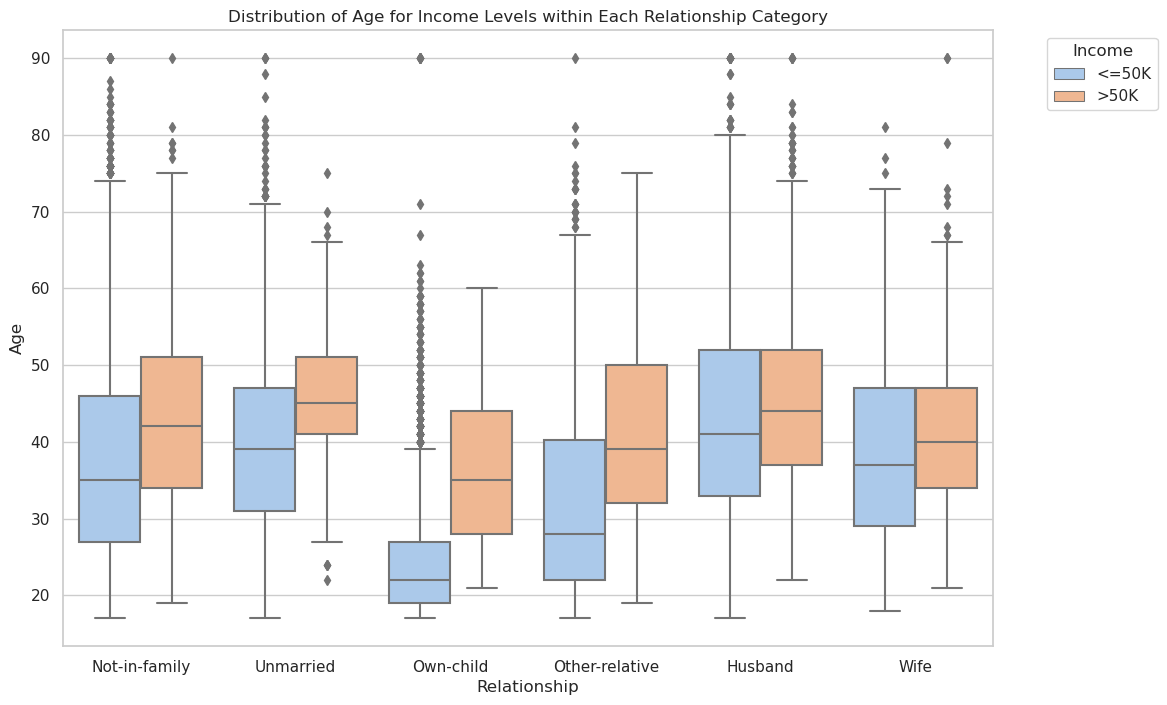

In [75]:
# relationship between income, age and relationship categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='relationship', y='age', hue='income', data=df, palette='pastel')
plt.title('Distribution of Age for Income Levels within Each Relationship Category')
plt.xlabel('Relationship')
plt.ylabel('Age')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('boxPlot.png', bbox_inches='tight', dpi=300)
plt.show()

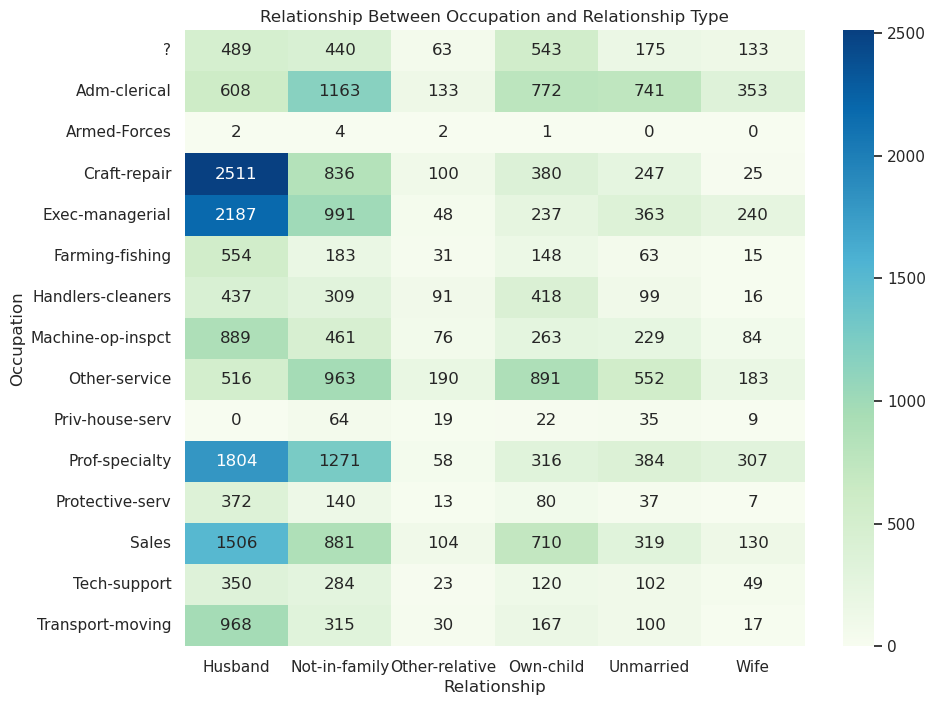

In [83]:
cross_tab = pd.crosstab(df['occupation'], df['relationship'])
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap="GnBu", fmt="d", cbar=True)
plt.title('Relationship Between Occupation and Relationship Type')
plt.xlabel('Relationship')
plt.ylabel('Occupation')
plt.savefig('correlationPlot2.png', bbox_inches='tight', dpi=300)
plt.show()